In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\derry\\Downloads\\archive\\heart_disease_uci.csv")

print(df.head())
print(df.tail())



   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
      id

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [38]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


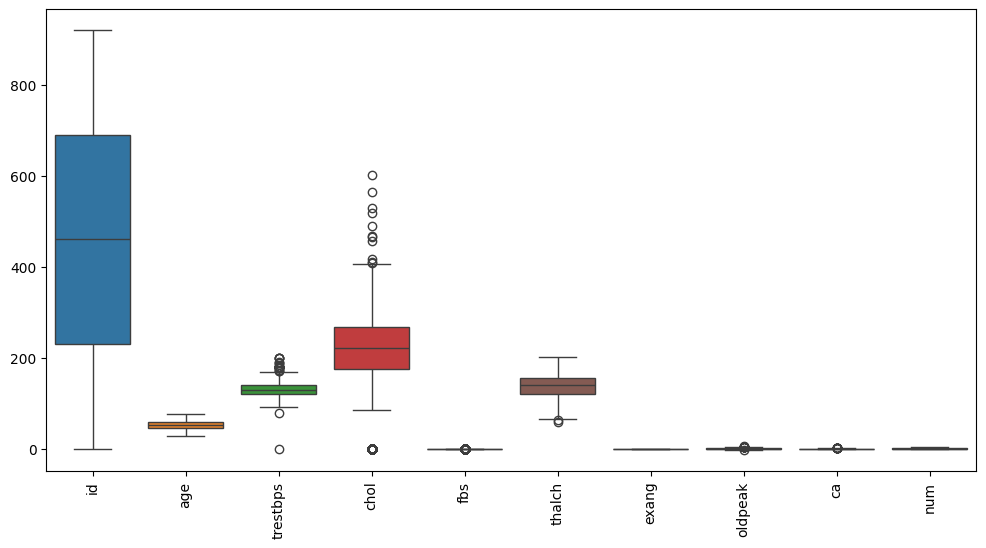

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [39]:
median_values = df.median(numeric_only=True)
print(median_values)


id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64


In [40]:
mean_values = df.mean(numeric_only=True)
print(mean_values)

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64


In [8]:
print(df.mode())

      id   age   sex    dataset            cp  trestbps  chol    fbs restecg  \
0      1  54.0  Male  Cleveland  asymptomatic     120.0   0.0  False  normal   
1      2   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
2      3   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
3      4   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
4      5   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
..   ...   ...   ...        ...           ...       ...   ...    ...     ...   
915  916   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
916  917   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
917  918   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
918  919   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
919  920   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   

     thalch  exang  oldpeak slope   ca 

In [18]:
#Jenis Kelamin (dlm bentuk string) 
#tidak bisa di convert dari string ke float, 
#maka jenis kelamin harus pakai kolom numerik
#spy bs di print

df['sex_encoded'] = df['sex'].map({'Male': 0, 'Female': 1})
numeric_columns = df.select_dtypes(include=[np.number]).columns

print(df[numeric_columns].skew())
print(df[numeric_columns].kurtosis())

id             0.000000
age           -0.195994
trestbps       0.213334
chol          -0.613836
thalch        -0.211119
oldpeak        1.041427
ca             1.165978
num            0.968880
sex_encoded    1.419879
dtype: float64
id            -1.200000
age           -0.382930
trestbps       2.958664
chol           0.062273
thalch        -0.479725
oldpeak        1.127069
ca             0.199498
num           -0.104325
sex_encoded    0.016088
dtype: float64


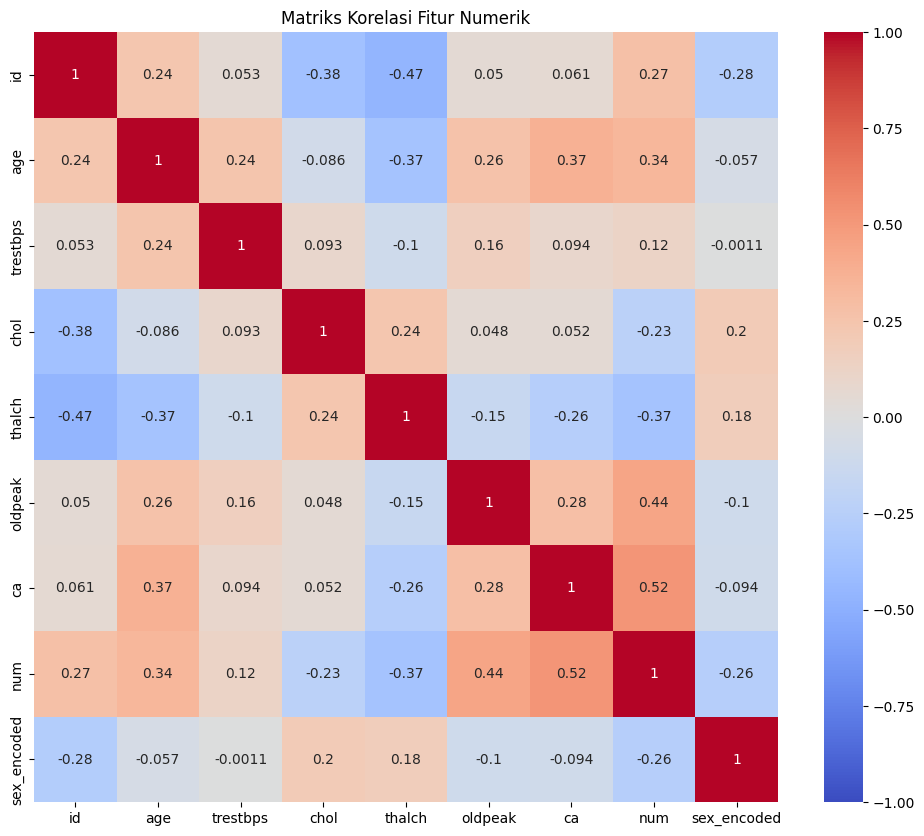

In [24]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

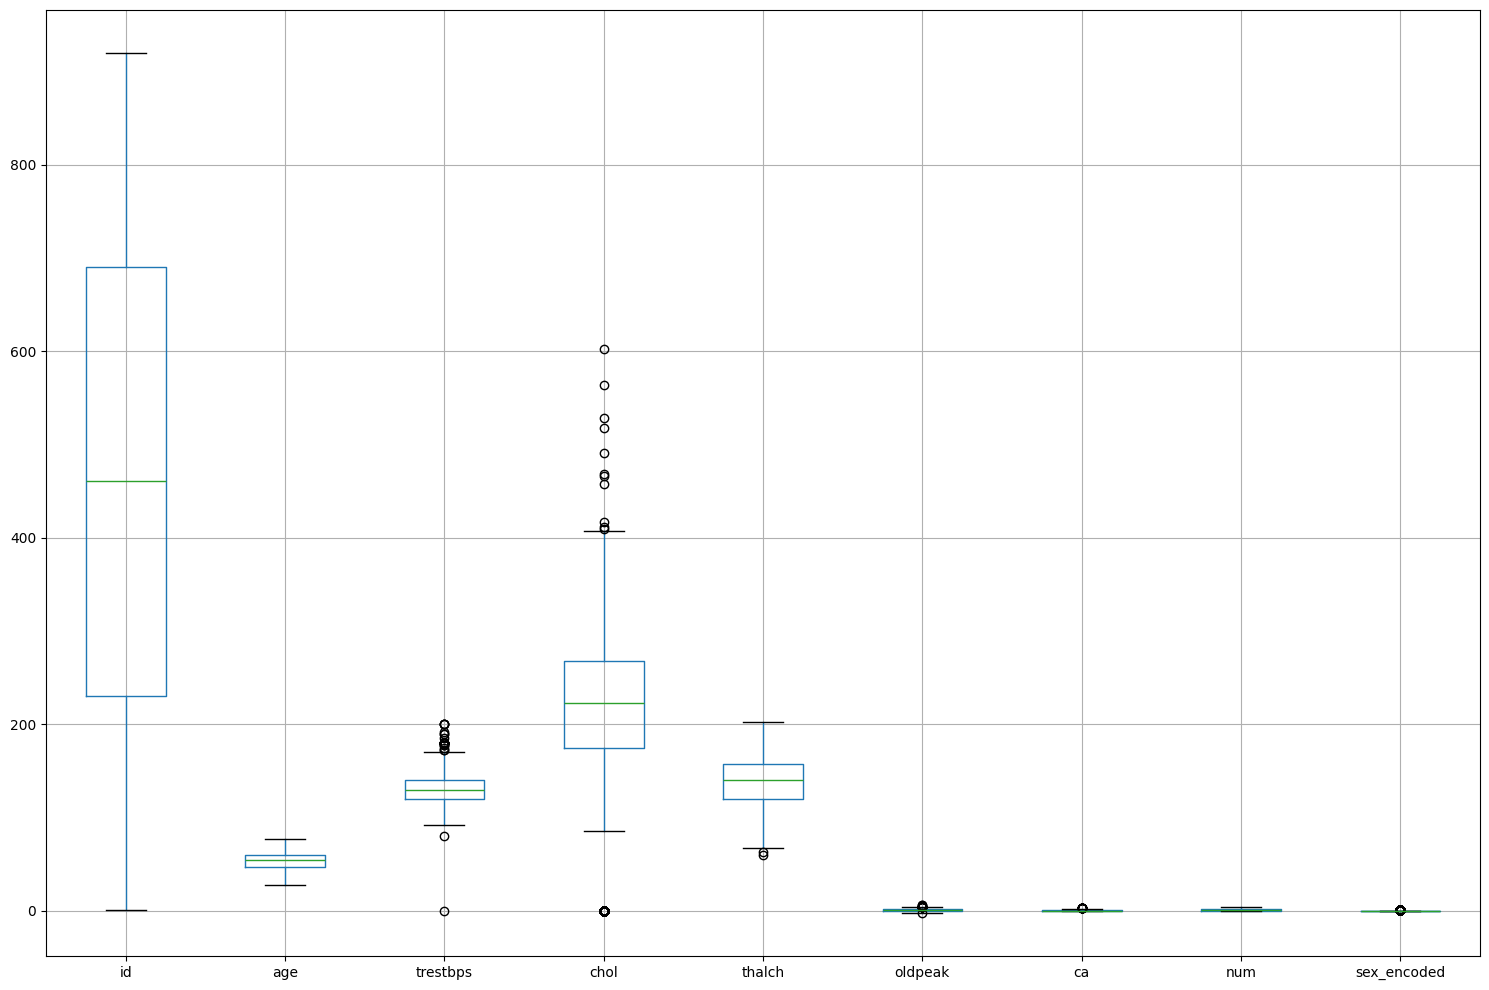

In [27]:
df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [31]:
#cek kolum yang tersedia untuk dijadikan target scatterplot

print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'sex_encoded'],
      dtype='object')


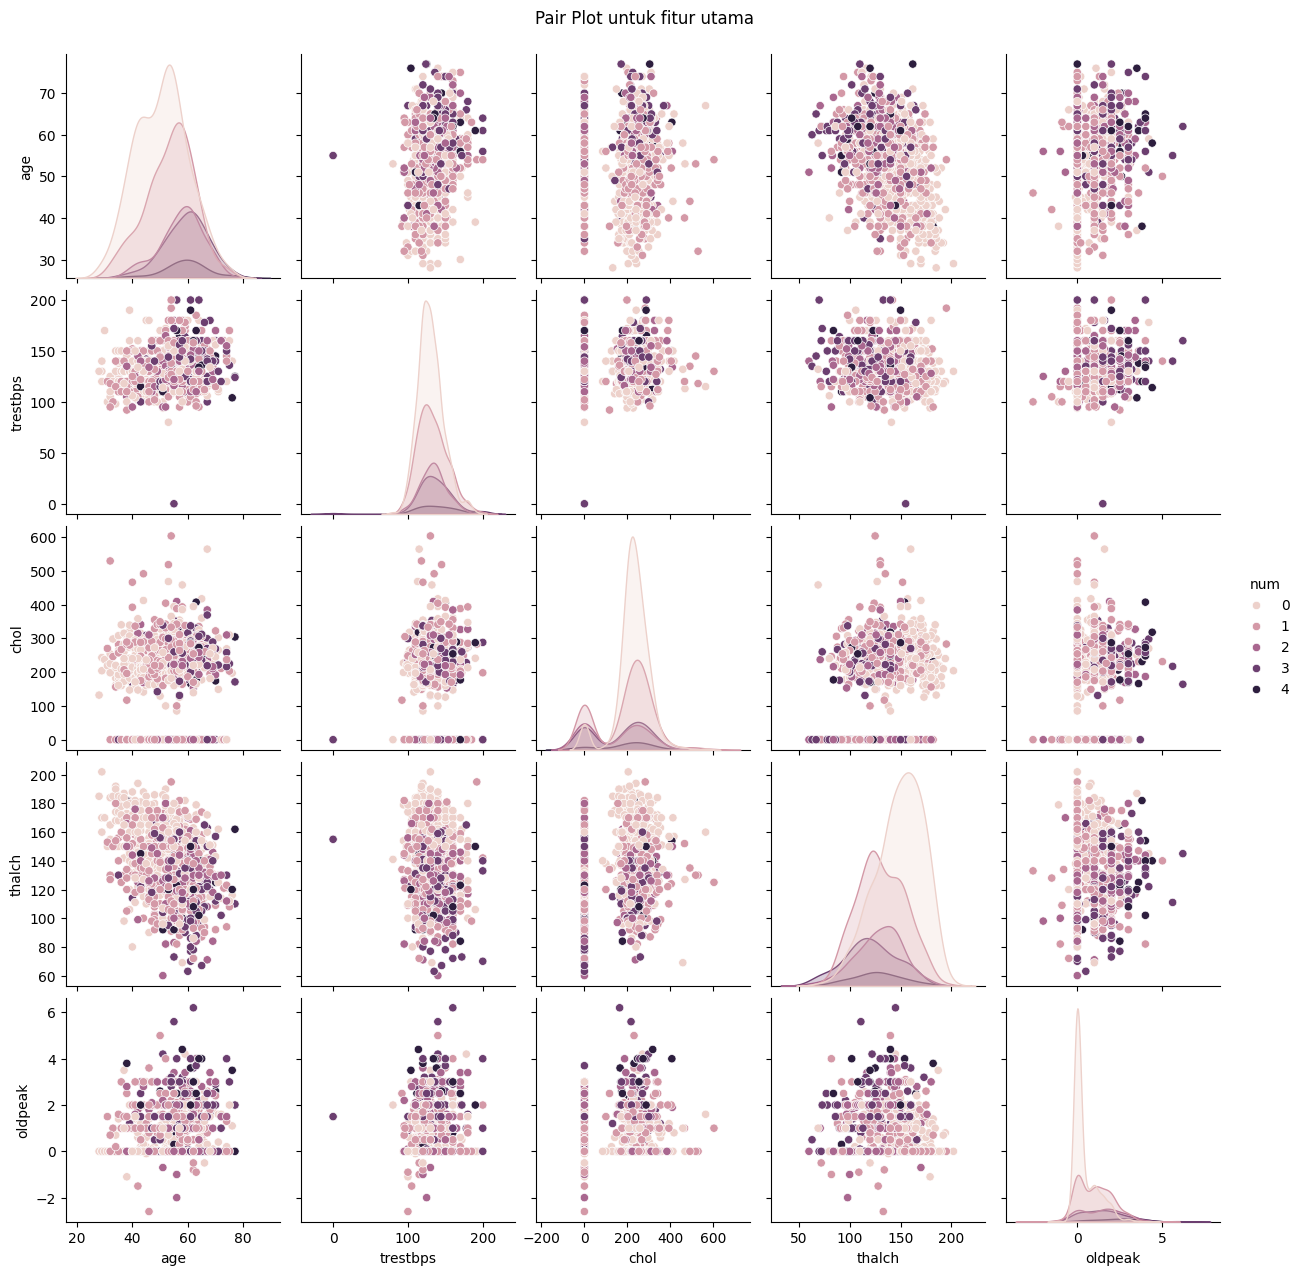

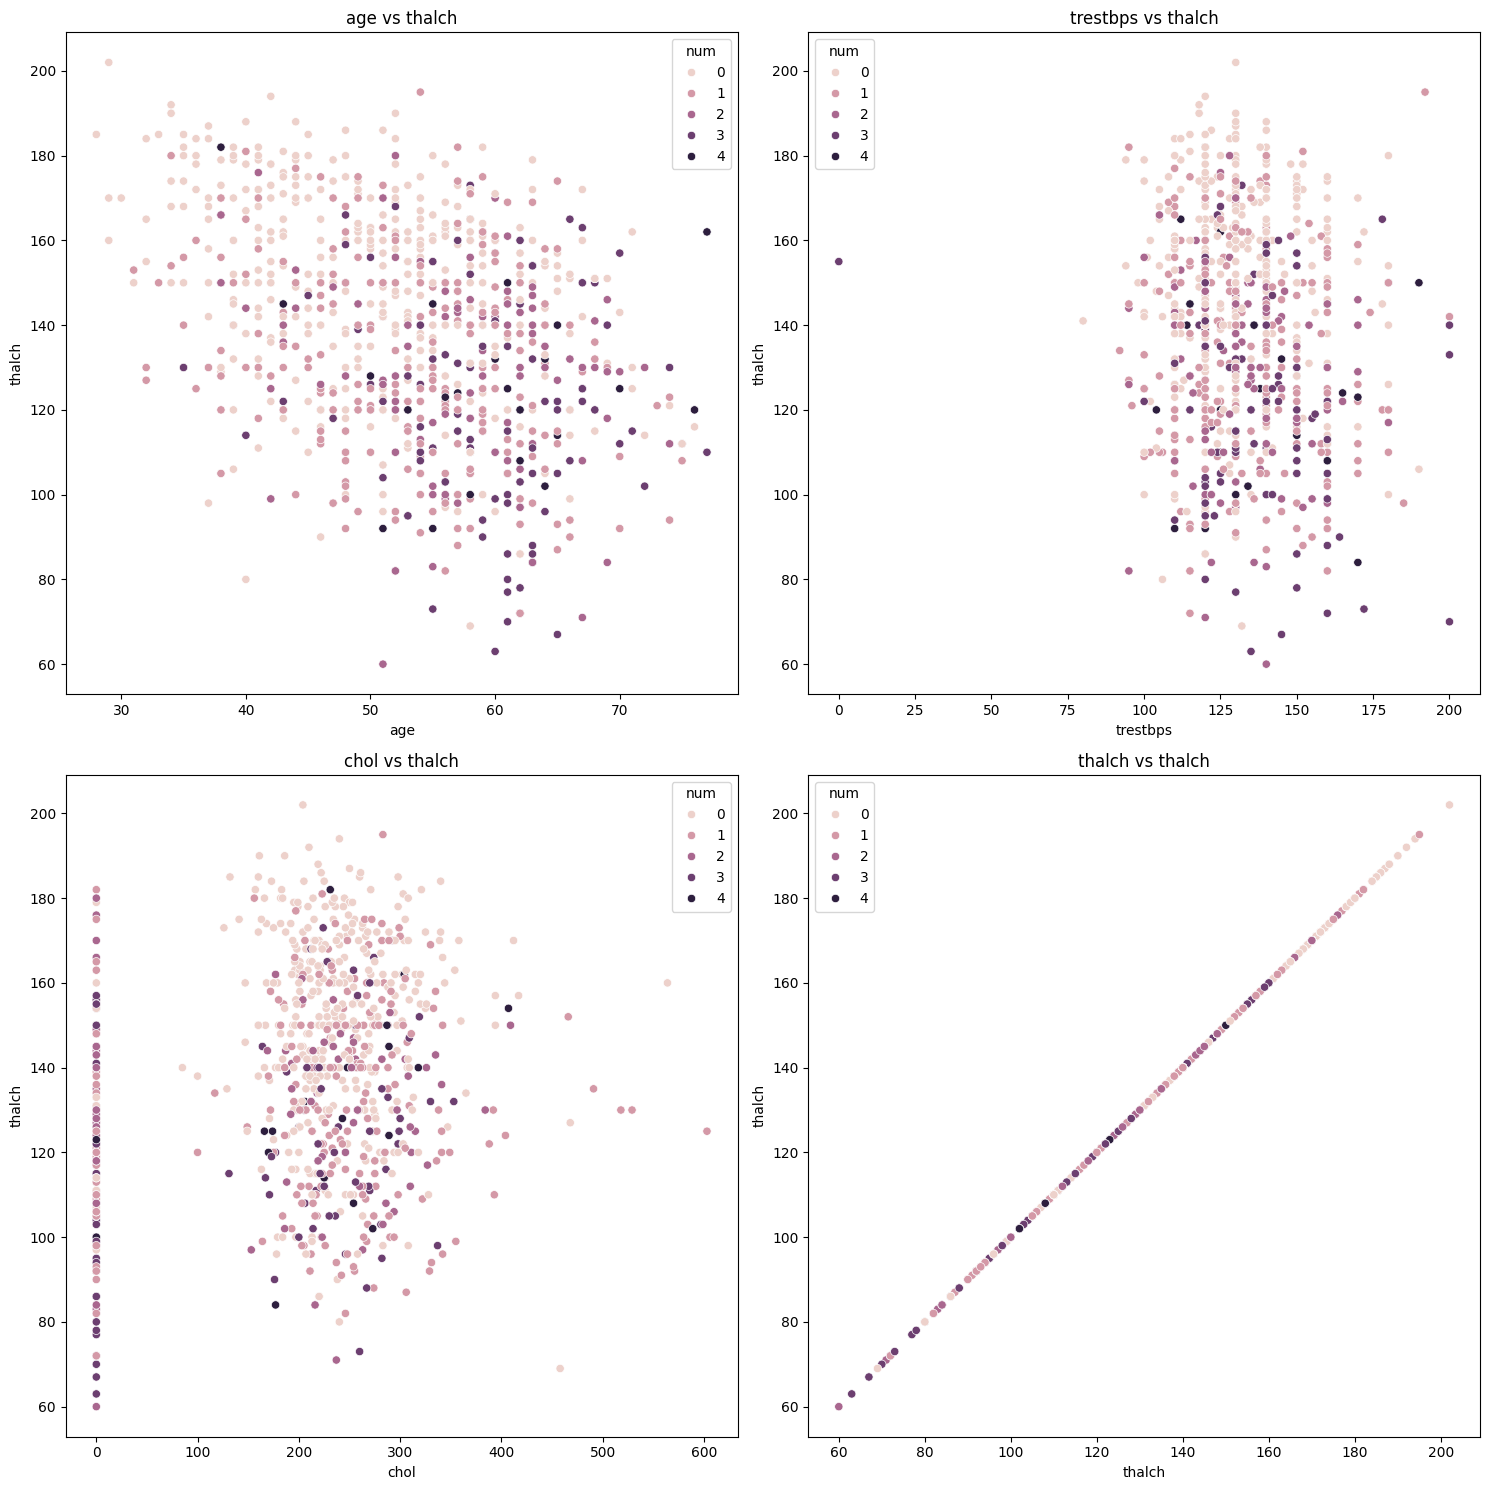

In [35]:
# buat variabel target
target_column = 'num'

# pilih fitur yg mau di visualisasiken
fitur_yg_divisualisasi = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# buat pairplot
sns.pairplot(df[fitur_yg_divisualisasi + [target_column]], hue=target_column)
plt.suptitle('Pair Plot untuk fitur utama', y=1.02)
plt.show()

# buat scatter plot scr individual
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for i, feature in enumerate(fitur_yg_divisualisasi[:4]):  # plot 4 fitur pertama
    sns.scatterplot(data=df, x=feature, y='thalch', hue=target_column, ax=axes[i])
    axes[i].set_title(f'{feature} vs thalch')

plt.tight_layout()
plt.show()

Pada kode ini kami melakukan analisis data....